In [28]:
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [29]:
#File to load
student_dropout_data = Path(r"C:\Users\jasmi\OneDrive\Documents\Project_3\Resources\student dropout.csv")

#Read and store file into Pandas dataframe
dropout_df = pd.read_csv(student_dropout_data)
dropout_df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


In [30]:
parents_together = dropout_df[dropout_df['Parental_Status'] == 'A']
total_parents_together = len(parents_together)
total_parents_together

80

In [31]:
parents_together_dropouts = dropout_df[(dropout_df['Parental_Status']== 'A') & (dropout_df['Dropped_Out']== True)]
parents_together_dropouts_total = len(parents_together_dropouts)
parents_together_dropouts_total

12

In [32]:
parents_apart = dropout_df[dropout_df['Parental_Status'] == 'T']
total_parents_apart = len(parents_apart)
total_parents_apart

569

In [33]:
parents_apart_dropouts = dropout_df[(dropout_df['Parental_Status'] == 'T') & (dropout_df['Dropped_Out'] == True)]
parents_apart_dropouts_total= len(parents_apart_dropouts)
parents_apart_dropouts_total

88

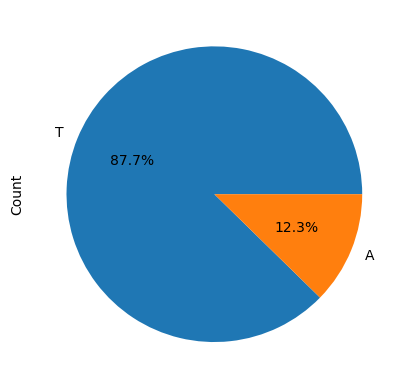

In [34]:
#Parents apart
apart_counts = dropout_df.Parental_Status.value_counts()
plt.pie(apart_counts.values, labels = apart_counts.index.values, autopct = "%1.1f%%" )
plt.ylabel("Count")
plt.show()

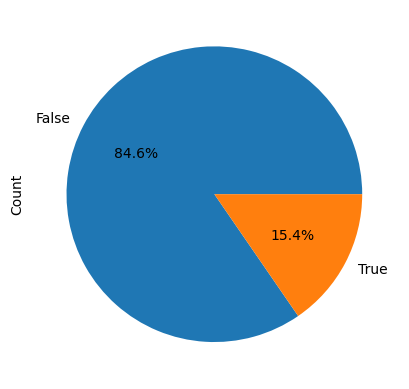

In [35]:
dropout_counts = dropout_df.Dropped_Out.value_counts()
plt.pie(dropout_counts.values, labels = dropout_counts.index.values, autopct = "%1.1f%%" )
plt.ylabel("Count")
plt.show()